                 Model  Accuracy  F1-score  Training + Prediction Time (s)
0  Logistic Regression  0.877778  0.886598                        0.000981
1            KNN (k=5)  0.900000  0.903226                        0.008060
2        Decision Tree  0.888889  0.893617                        0.000997
3          Naive Bayes  0.877778  0.881720                        0.000000


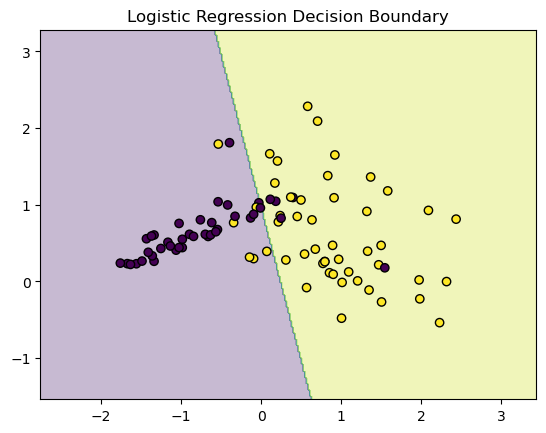

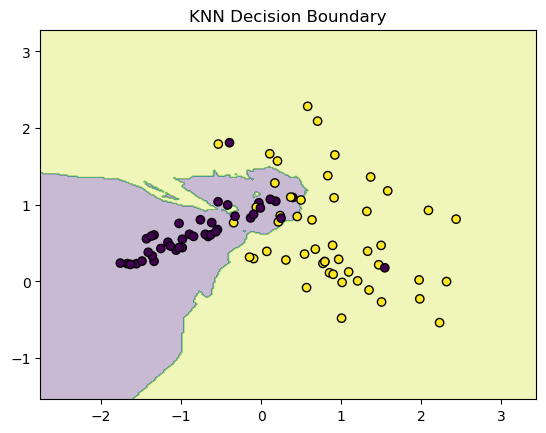

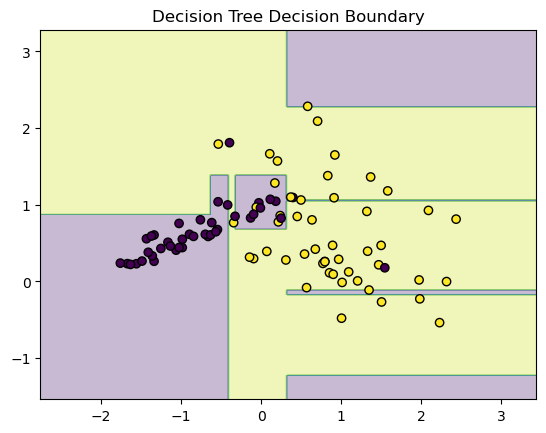

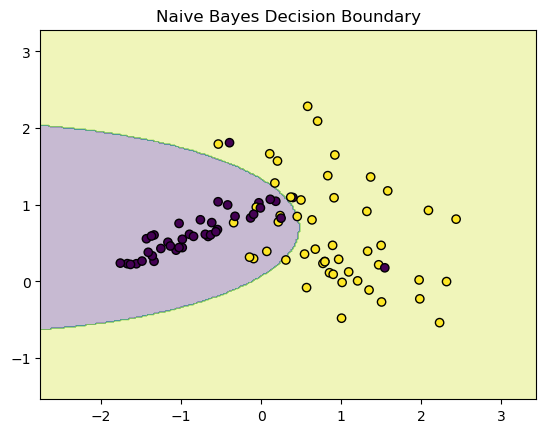

In [4]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# A small dataset creation with nonlinear structure
X, y = make_classification(
    n_samples=300,        # small dataset
    n_features=2,         # 2D for visualization
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    class_sep=0.7,
    flip_y=0.1,
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(max_depth=5),
    "Naive Bayes": GaussianNB()
}

# Train, evaluate, and time each model
results = []

for name, model in models.items():
    start = time.time()
    
    if name in ["Logistic Regression", "KNN (k=5)"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    elapsed = time.time() - start
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results.append([name, acc, f1, elapsed])

results_df = pd.DataFrame(
    results,
    columns=["Model", "Accuracy", "F1-score", "Training + Prediction Time (s)"]
)

print(results_df)

# Visualize decision boundaries
def plot_decision_boundary(model, X, y, title, scaled=False):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )
    
    grid = np.c_[xx.ravel(), yy.ravel()]
    if scaled:
        grid = scaler.transform(grid)
    
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
    plt.title(title)
    plt.show()

    
plot_decision_boundary(
    models["Logistic Regression"],
    X_test, y_test,
    "Logistic Regression Decision Boundary",
    scaled=True
)

plot_decision_boundary(
    models["KNN (k=5)"],
    X_test, y_test,
    "KNN Decision Boundary",
    scaled=True
)

plot_decision_boundary(
    models["Decision Tree"],
    X_test, y_test,
    "Decision Tree Decision Boundary"
)

plot_decision_boundary(
    models["Naive Bayes"],
    X_test, y_test,
    "Naive Bayes Decision Boundary"
)


### Hyperparameter sensitivity experiments
(a) KNN: vary k

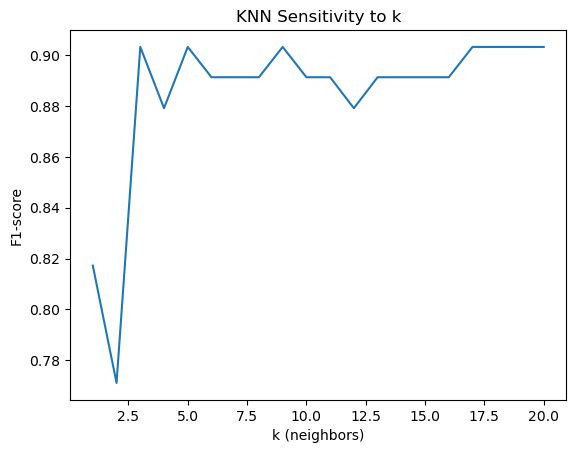

In [5]:
k_values = range(1, 21)
f1_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    f1_scores.append(f1_score(y_test, y_pred))

plt.plot(k_values, f1_scores)
plt.xlabel("k (neighbors)")
plt.ylabel("F1-score")
plt.title("KNN Sensitivity to k")
plt.show()


(b) Decision Tree: vary max_depth

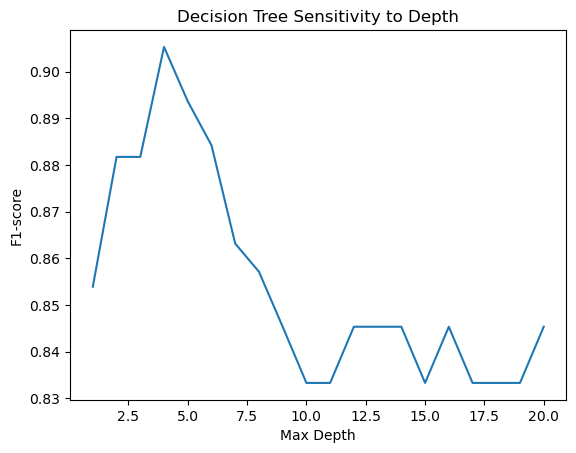

In [6]:
depths = range(1, 21)
f1_scores = []

for d in depths:
    tree = DecisionTreeClassifier(max_depth=d)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    f1_scores.append(f1_score(y_test, y_pred))

plt.plot(depths, f1_scores)
plt.xlabel("Max Depth")
plt.ylabel("F1-score")
plt.title("Decision Tree Sensitivity to Depth")
plt.show()


| Model               | Small Data | Nonlinear Boundary | Speed              | Hyperparameter Sensitivity |
| ------------------- | ---------- | ------------------ | ------------------ | -------------------------- |
| Logistic Regression | Moderate   | Poor               | Very Fast          | Low                        |
| KNN                 | Good       | Very Good          | Slow at prediction | High (k)                   |
| Decision Tree       | Very Good  | Excellent          | Fast               | High (depth)               |
| Naive Bayes         | Good       | Limited            | Very Fast          | Very Low                   |


#### Key takeaways 
- Logistic Regression struggles with nonlinear boundaries
- KNN adapts well but is sensitive to k and slower
- Decision Tree captures nonlinear patterns easily but overfits
- Naive Bayes is fast and simple but makes strong assumptions